## Practice 1

In this notebook the challenge is to use Pandas, and appropriate ancillary modules, to load in data on passengers from the Titanic. The dataset, found on a [public repository](https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5), has these columns: 

 - PassengerId
 - Survived
 - P-class
 - Name
 - Sex
 - Age
 - SibSp
 - Parch
 - Ticket
 - Fare
 - Cabin
 - Embarked.
 
You are given no context on any aspects of the data. Your challenge is to use Pandas to explore the dataset and produce at least two outputs:

 - 1) Histograms on the age distribution for male and females in each class. Try to make sure each x axis has the same range.
 - 2) Investigate features [class, age, sex] on those who survived and those who didnt.
 
The relevant class notebooks which may help here are Practical sessions 5,6,7 and 8. 

In [1]:
import pandas as pd 

# Read data from file 
# We are going to use the function 'read_csv' within the Pandas package:

if 'google.colab' in str(get_ipython()):
    data = pd.read_csv('https://raw.githubusercontent.com/loftytopping/DEES_programming_course/master/extra_activities/data/titanic_data.csv')
    data.head()
else:
    data = pd.read_csv("data/titanic_data.csv") 
    data.head()
    
# The following command removes any entries that are not numbers, or NaNs [Not-A-Number]    
data=data.dropna(subset=['Age'])

In [2]:
# Lets take a preview of the dataframe we have created
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Lets see how many entries we have
data.size

8568

## 1) - Histograms on the age and sex distribution in each class

In [5]:
# Befoore I create histograms for each class, I need to know how many classes there are. We can use the value_counts() function for that.
data['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

(0.42, 80.0)

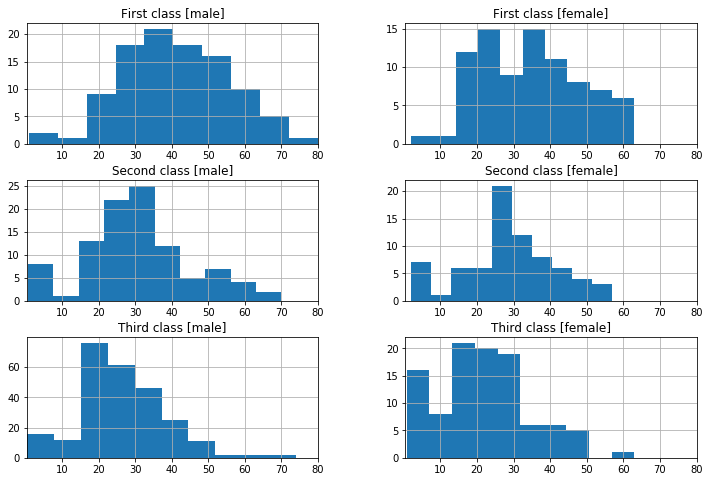

In [6]:
# Now produce histograms. Please take a look at the course practical notebooks if anything isnt clear. 
import matplotlib.pyplot as plt
import numpy as np

# Create a canvas for our plot
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharey=False)
# First class
data[(data['Pclass']==1) & (data['Sex']=='male')].hist(column='Age',ax=axs[0,0])
axs[0,0].set_title('First class [male]')
data[(data['Pclass']==1) & (data['Sex']=='female')].hist(column='Age',ax=axs[0,1])
axs[0,1].set_title('First class [female]')

# Second class
data[(data['Pclass']==2) & (data['Sex']=='male')].hist(column='Age',ax=axs[1,0])
axs[1,0].set_title('Second class [male]')
data[(data['Pclass']==2) & (data['Sex']=='female')].hist(column='Age',ax=axs[1,1])
axs[1,1].set_title('Second class [female]')

# Third class
data[(data['Pclass']==3) & (data['Sex']=='male')].hist(column='Age',ax=axs[2,0])
axs[2,0].set_title('Third class [male]')
data[(data['Pclass']==3) & (data['Sex']=='female')].hist(column='Age',ax=axs[2,1])
axs[2,1].set_title('Third class [female]')

# Im also going to set the maximum and minimum limits on each x axis to be the same. 
# to do this Im going to work out these numbers from the age column

min_age = np.min(data['Age'].values)
max_age = np.max(data['Age'].values)

axs[0,0].set_xlim([min_age, max_age])
axs[0,1].set_xlim([min_age, max_age])
axs[1,0].set_xlim([min_age, max_age])
axs[1,1].set_xlim([min_age, max_age])
axs[2,0].set_xlim([min_age, max_age])
axs[2,1].set_xlim([min_age, max_age])



##  2) Investigate features [class, age, sex] on those who survived and those who didnt.

I can find which column metric I need to use to define a passenger who survived. But how we do we produce a histogram for categorical variables. Specifically, we want to visualise the distribution of people in each class and also their sex. We can use a histogram for age, but we will use a bar plot for both class and sex. 

The code to produce a bar plot looks a little different from a histogram. You may replicate the following example, changing the reference to column name and axis where appropriate:

<code>
data[data['Survived']==1]['Pclass'].value_counts().plot(kind='bar',ax=axs[0,1])
</code>

Text(0.5, 1.0, 'Sex [did not survive]')

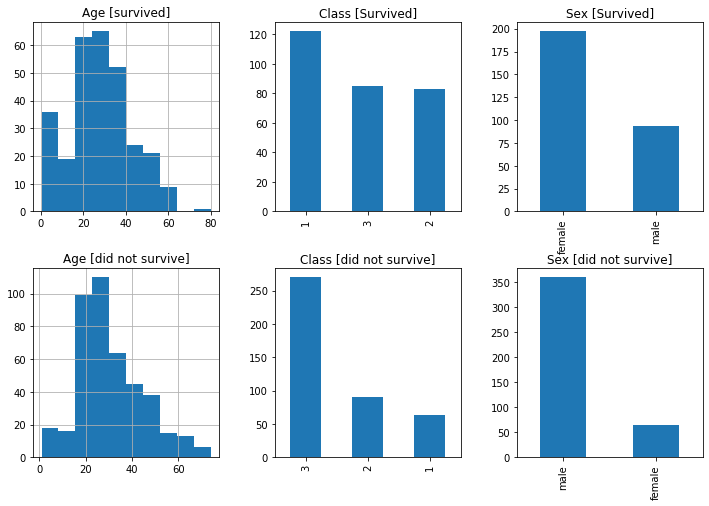

In [36]:

# Create a canvas for our plot
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=False)

# Survived
data[data['Survived']==1].hist(column='Age',ax=axs[0,0])
axs[0,0].set_title('Age [survived]')
data[data['Survived']==1]['Pclass'].value_counts().plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title('Class [Survived]')
data[data['Survived']==1]['Sex'].value_counts().plot(kind='bar',ax=axs[0,2])
axs[0,2].set_title('Sex [Survived]')

# Didnt survice
data[data['Survived']==0].hist(column='Age',ax=axs[1,0])
axs[1,0].set_title('Age [did not survive]')
data[data['Survived']==0]['Pclass'].value_counts().plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title('Class [did not survive]')
data[data['Survived']==0]['Sex'].value_counts().plot(kind='bar',ax=axs[1,2])
axs[1,2].set_title('Sex [did not survive]')
